Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**NB. Do not add new or remove/cut cells in the notebook. Additionally, do not change the filename of this notebook.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your student number below:

In [1]:
STUDENT_NUMBER = "141927"

---

# Exercises Topic 4

In [2]:
# imports

import numpy as np
from matplotlib import pyplot as plt

## Exercise 4.1: Detecting periodicity (4 points)

In the folder that you obtained this notebook there is a file called
`sunspots.txt`, which contains the observed number of sunspots on the
Sun for each month since January 1749.  The file contains two columns of
numbers, the first representing the month and the second being the sunspot
number.

(a) Write a program that reads the data in the file and makes a graph of
  sunspots as a function of time.  You should see that the number of
  sunspots has fluctuated on a regular cycle for as long as observations
  have been recorded.  Make an estimate of the length of the cycle in
  months.
  

Text(0, 0.5, 'sunspot (#)')

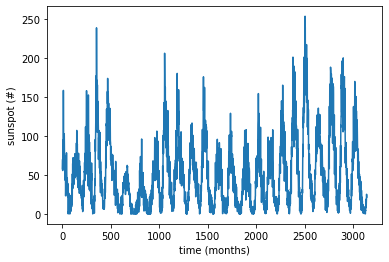

In [3]:
def read_sunspot_data(filename):
    """Reads and returns sunspot data
    
    Args:
        filename (str): name of the file
    
    Returns:
        numpy array: the data"""
    
    data = None
    
    # YOUR CODE HERE
    data = np.loadtxt(filename)
    #raise NotImplementedError()
    
    return data

data = read_sunspot_data('sunspots.txt')
# plotting
# YOUR CODE HERE
plt.plot(data[:,0], data[:,1])
#raise NotImplementedError()
plt.xlabel('time (months)')
plt.ylabel('sunspot (#)')

### Answer (Double click to edit)
There seems to 24 peaks in a time period of 3143 months, or about 272 years.
This means that a peak occurs every ~131 months, or once in every 11 years.

In [4]:
# validation
fn = read_sunspot_data('sunspots.txt')
assert isinstance(fn, np.ndarray), 'bad function'
assert fn.shape == (3143, 2), 'bad shape'
assert fn.dtype == float, 'bad type'

(b) Modify your program to calculate the Fourier transform of the sunspot
  data and then make a graph of the magnitude squared $|c_k|^2$ of the
  Fourier coefficients as a function of $k$---also called the
  *power spectrum* of the sunspot signal.  You should see that
  there is a noticeable peak in the power spectrum at a nonzero value
  of~$k$.  The appearance of this peak tells us that there is one frequency
  in the Fourier series that has a higher amplitude than the others around
  it---meaning that there is a large sine-wave term with this frequency,
  which corresponds to the periodic wave you can see in the original data.

In [5]:
def discrete_fourier_transform(y):
    """Calculates coefficient of the discrete trasnform of 1D y
    
    Args:
        y (numpy array): 1D data
    
    Returns:
        numpy array: 1D array of coefficients after fourier transform"""
    # coefficients
    c = None
    
    # YOUR CODE HERE
    N = len(y)
    n = np.arange(N)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        c[k] = np.sum(y*np.exp(-2j*np.pi*k*n/N))
    #raise NotImplementedError()
    return c

In [6]:
# validation
n = 10
fn = np.sin(np.arange(n))
dft = discrete_fourier_transform(fn)
c_k2 = np.abs(dft)**2
assert abs(c_k2[0] - 3.82284412) <= 1e-4, 'bad function' 
assert abs(c_k2[1] - 10.28600735) <= 1e-4, 'bad function' 

Text(0, 0.5, '$c_k^2$')

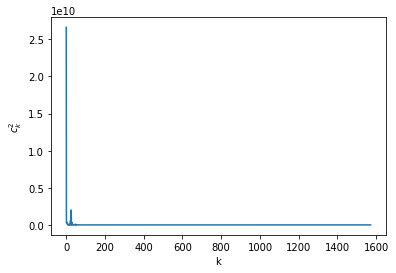

In [7]:
fft_data = discrete_fourier_transform(data[:, 1])

#plotting
# YOUR CODE HERE
plt.plot(np.square(abs(fft_data)))
#raise NotImplementedError()
plt.xlabel('k')
plt.ylabel('$c_k^2$')

k = 24: freq = 3143/24 = 130.95833333333334


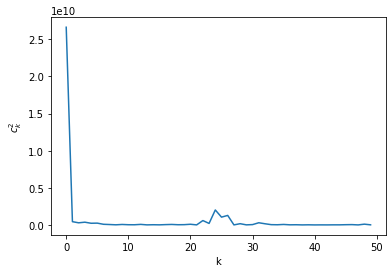

In [8]:
plt.plot(np.square(abs(fft_data[0:50])))  # Zoom closer to the non-zero peak
#raise NotImplementedError()
plt.xlabel('k')
plt.ylabel('$c_k^2$')

k = 24
N = data.shape[0]
print(f"k = {k}: freq = {N}/{k} = {N/k}")

(c) Find the approximate value of $k$ to which the peak corresponds.
  What is the period of the sine wave with this value of $k$?  You should
  find that the period corresponds roughly to the length of the cycle that
  you estimated in part~(a).
  

This kind of Fourier analysis is a sensitive method for detecting
periodicity in signals.  Even in cases where it is not clear to the eye
that there is a periodic component to a signal, it may still be possible to
find one using a Fourier transform.

### Answer (Double click to edit)

From the plot, it can be visually estimated that the peak occurs approximately at $k=24$. When the total number of data points, 3143, is divided by $k$, we get the frequency: $N/k = 3143$ months $/24 \approx 130.96$ months, which is very close to the approximated value 131 months.

## Exercise 4.2: Fourier filtering and smoothing (6 points)

In the folder that you obtained this notebook you'll find a file called `dow.txt`.
It contains the daily closing value for each business day from late 2006
until the end of 2010 of the Dow Jones Industrial Average, which is a
measure of average prices on the US stock market.

Write a program to do the following:

(a) Read in the data from `dow.txt` and plot them on a graph.

Text(0, 0.5, 'closing value')

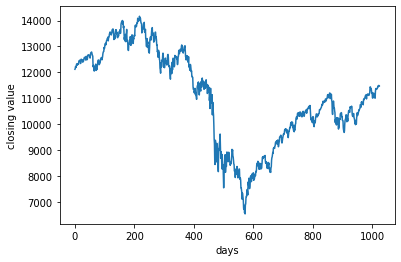

In [9]:
def read_dow_data(filename):
    """read dow data from filename
    
    Args:
        filename (str): name of the file
    
    Returns:
        numpy array: dow data"""
    data = None
    
    # YOUR CODE HERE
    data = np.loadtxt(filename)
    #raise NotImplementedError()
    
    return data

data = read_dow_data('dow.txt')

# plotting
# YOUR CODE HERE
plt.plot(data)
#raise NotImplementedError()
plt.xlabel('days')
plt.ylabel('closing value')

In [10]:
# validation
fn = read_dow_data('dow.txt')
assert isinstance(fn, np.ndarray), 'bad function'
assert fn.shape == (1024,), 'bad function'
assert fn.dtype == float, 'bad function'

(b) Calculate the coefficients of the discrete Fourier transform of the
  data using the function `rfft` from `numpy.fft`, which produces
  an array of $\frac{1}{2} N+1$ complex numbers.
 

In [11]:
def dft_numpy(y):
    """Perform numpy rfft
    
    Args:
        y (array): input data
    Returns:
        numpy array: dft of data
    """
    dft = None
    # modifications on y should not change incomming data too
    y = np.copy(y)

    # YOUR CODE HERE
    dft = np.fft.rfft(y)
    #raise NotImplementedError()
    
    return dft

# compute dft
dft_data = dft_numpy(data)

In [12]:
# validation
n = 10
fn = np.sin(np.arange(n))
dft = dft_numpy(fn)
c_k2 = np.abs(dft)**2
assert abs(c_k2[0] - 3.82284412) <= 1e-4, 'bad function' 
assert abs(c_k2[1] - 10.28600735) <= 1e-4, 'bad function' 

(c) Now set all but the first 10\% of the elements of this array to zero
  (i.e.,~set the last 90\% to zero but keep the values of the first 10\%).

In [13]:
def data_trim(y, x):
    """trim data, by making all but first x% elements to zero
    
    Args:
        y (numpy array): fft data
        x (float): percentage of first elements to be the same
    Returns:
        numpy array: trimmed data
    """
    partc_out = None
    # modifications on y should not change incomming data too
    y = np.copy(y)
    
    # YOUR CODE HERE
    i = int(len(y)*x/100)
    partc_out = np.zeros_like(y)
    partc_out[:i] = y[:i]
    #raise NotImplementedError()
    
    return partc_out

dft_data_trimmed = data_trim(dft_data, 10)

In [14]:
# validation
a = np.arange(1, 11)
a_trimmed = data_trim(a, 10)
assert len(a_trimmed) == len(a), 'bad function'
for i in range(1, 10):
    assert len(np.where(data_trim(a, i*10)==0)[0]) == 10 - i, 'bad function at i = {}'.format(i)

(d) Calculate the inverse Fourier transform of the resulting array, zeros
  and all, using the function \verb|irfft|, and plot it on the same graph
  as the original data.  You may need to vary the colors of the two curves
  to make sure they both show up on the graph.  Comment on what you see.
  What is happening when you set the Fourier coefficients to zero?

Text(0, 0.5, 'closing value')

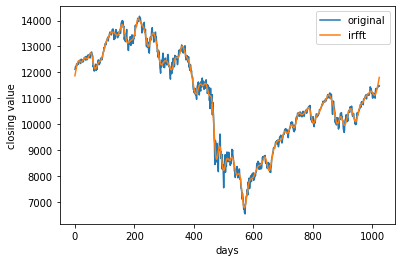

In [15]:
def idft_numpy(y):
    """Perform numpy irfft
    
    Args:
        y (array): input data
    Returns:
        numpy array: dft of data
    """
    idft = None
    # modifications on y should not change incomming data too
    y = np.copy(y)

    # YOUR CODE HERE
    idft = np.fft.irfft(y)
    #raise NotImplementedError()
    
    return idft

# compute idft
data_idft = idft_numpy(dft_data_trimmed)

# plotting
# YOUR CODE HERE
plt.plot(data, label='original')
plt.plot(data_idft, label='irfft')
plt.legend()
#raise NotImplementedError()
plt.xlabel('days')
plt.ylabel('closing value')

### Answer (Double click to edit)
The inverse FFT adapts to the original data quite well. Increasing the percentage x of the data used to perform the inverse FFT, i.e. decreasing the number of zeros, makes the irfft data more accurate. In other words, decreasing the percentage makes the function smoother. 10% data usage already seems to be enough to get very good approximation of the original data.

In [16]:
# validation
n = 10
fn = np.sin(np.arange(n))
dft = dft_numpy(fn)
fn_idft = idft_numpy(dft)
assert np.mean(np.abs(fn - fn_idft)) <= 1e-4, 'bad function' 

(e) Modify your program so that it sets all but the first 2\% of the
  coefficients to zero and run it again.

Text(0, 0.5, 'closing value')

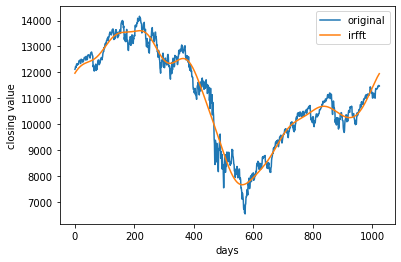

In [17]:
# get trimmed data
# YOUR CODE HERE
dft_data_trimmed_2 = data_trim(dft_data, 2)
data_idft_2 = idft_numpy(dft_data_trimmed_2)
#raise NotImplementedError()

# plotting
# YOUR CODE HERE
plt.plot(data, label='original')
plt.plot(data_idft_2, label='irfft')
plt.legend()
#raise NotImplementedError()
plt.xlabel('days')
plt.ylabel('closing value')

## Exercise 4.3: Comparison of the DFT and DCT (3 points)

Exercise 4.2 looked at data representing the variation of the Dow Jones
Industrial Average, colloquially called "the Dow," over time.  The
particular time period studied in that exercise was special in one sense:
the value of the Dow at the end of the period was almost the same as at the
start, so the function was, roughly speaking, periodic.  In the folder that you obtained this notebook there is another file called `dow2.txt`, which also contains
data on the Dow but for a different time period, from 2004 until 2008.
Over this period the value changed considerably from a starting level
around 9000 to a final level around 14000.

(a) Write a program in
  which you read the data in the file `dow2.txt` and plot it on a
  graph.  Then smooth the data by calculating its Fourier transform,
  setting all but the first 2\% of the coefficients to zero, and inverting
  the transform again, plotting the result on the same graph as the
  original data.  You should see that the data are
  smoothed, but now there will be an additional artifact.  At the beginning
  and end of the plot you should see large deviations away from the true
  smoothed function.  These occur because the function is required to be
  periodic---its last value must be the same as its first---so it needs to
  deviate substantially from the correct value to make the two ends of the
  function meet.  In some situations (including this one) this behavior is
  unsatisfactory.  If we want to use the Fourier transform for smoothing,
  we would certainly prefer that it not introduce artifacts of this kind.

Text(0, 0.5, 'DOW closing values')

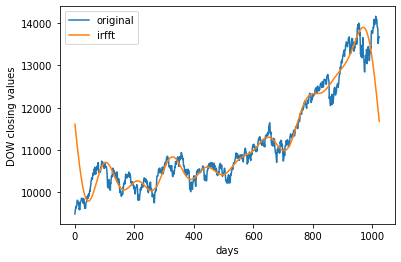

In [18]:
# use already made functions in 4.2
# YOUR CODE HERE
data = read_dow_data('dow2.txt')
dft_data = dft_numpy(data)
dft_data_trimmed = data_trim(dft_data, 2)
data_idft = idft_numpy(dft_data_trimmed)
#raise NotImplementedError()

# plotting
# YOUR CODE HERE
plt.plot(data, label='original')
plt.plot(data_idft, label='irfft')
plt.legend()
#raise NotImplementedError()
plt.xlabel('days')
plt.ylabel('DOW closing values')

(b) Modify your program to repeat the same analysis using discrete cosine
  transforms.  You can use the functions from `dcst.py` (in the folder that you obtained this notebook) to perform the
  transforms if you wish.  Again discard all but the first 2\% of the
  coefficients, invert the transform, and plot the result.  You should see
  a significant improvement, with less distortion of the function at the
  ends of the interval.  This occurs because the cosine transform does not force the value of the
  function to be the same at both ends.

It is because of the artifacts introduced by the strict periodicity
of the DFT that the cosine transform is favored for many technological
applications, such as audio compression.  The artifacts can degrade the
sound quality of compressed audio and the cosine transform generally gives
better results.

The cosine transform is not wholly free of artifacts itself however.  It's
true it does not force the function to be periodic, but it does force the
gradient to be zero at the ends of the interval (which the ordinary Fourier
transform does not).  You may be able to see this in your calculations for
part (b) above.  Look closely at the smoothed function and you should see
that its slope is flat at the beginning and end of the interval.  The
distortion of the function introduced is less than the distortion in
part (a), but it's there all the same.  To reduce this effect, audio
compression schemes often use overlapped cosine transforms, in which
transforms are performed on overlapping blocks of samples, so that the
portions at the ends of blocks, where the worst artifacts lie, need not be
used.

Text(0, 0.5, 'DOW closing values')

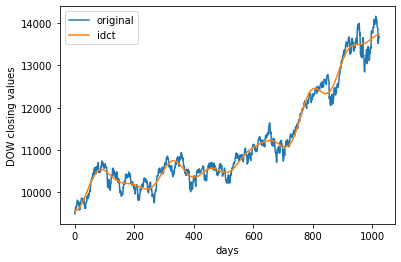

In [19]:
# use already made functions in 4.2 and dcst.py
from dcst import dct, idct
# YOUR CODE HERE
data = read_dow_data('dow2.txt')
dct_data = dct(data)
dct_data_trimmed = data_trim(dct_data, 2)
data_idct = idct(dct_data_trimmed)
#raise NotImplementedError()

# plotting
# YOUR CODE HERE
plt.plot(data, label='original')
plt.plot(data_idct, label='idct')
plt.legend()
#raise NotImplementedError()
plt.xlabel('days')
plt.ylabel('DOW closing values')


## Exercise 4.4: Image deconvolution (7 points)

You've probably seen it on TV, in one of those crime drama shows.
They have a blurry photo of a crime scene and they click a few buttons on
the computer and magically the photo becomes sharp and clear, so you can
make out someone's face, or some lettering on a sign.  Surely (like almost
everything else on such TV shows) this is just science fiction?  Actually,
no.  It's not.  It's real and in this exercise you'll write a program that
does it.

When a photo is blurred each point on the photo gets smeared out
according to some "smearing distribution," which is technically called a
*point spread function*.  We can represent this smearing
mathematically as follows.  For simplicity let's assume we're working with
a black and white photograph, so that the picture can be represented by a
single function $a(x,y)$ which tells you the brightness at each
point $(x,y)$.  And let us denote the point spread function by $f(x,y)$.
This means that a single bright dot at the origin ends up appearing as
$f(x,y)$ instead.  If $f(x,y)$ is a broad function then the picture is
badly blurred.  If it is a narrow peak then the picture is relatively
sharp.

In general the brightness $b(x,y)$ of the blurred photo at point $(x,y)$ is
given by

$$\begin{equation}
b(x,y) = \int_0^K \int_0^L a(x',y') f(x-x',y-y') \>d x'\>d y',
\end{equation}$$

where $K\times L$ is the dimension of the picture.  This equation is called
the *convolution* of the picture with the point spread
function.

Working with two-dimensional functions can get complicated, so to get the
idea of how the math works, let's switch temporarily to a one-dimensional
equivalent of our problem.  Once we work out the details in 1D we'll return
to the 2D version.  The one-dimensional version of the convolution above
would be

$$\begin{equation}
b(x) = \int_0^L a(x') f(x-x') \>d x'.
\end{equation}$$

The function $b(x)$ can be represented by a Fourier series as in Eq. (7.5):

$$\begin{equation}
b(x) = \sum_{k=-\infty}^\infty
         \tilde{b}_k \exp\biggl( i {2\pi k x\over L} \biggr),
\end{equation}$$

where

$$\begin{equation}
\tilde{b}_k = {1\over L} \int_0^L b(x)
                         \exp\biggl( -i {2\pi k x\over L} \biggr) \>d x
\end{equation}$$

are the Fourier coefficients.  Substituting for $b(x)$ in this equation
gives

$$\begin{align*}
\tilde{b}_k &= {1\over L} \int_0^L \int_0^L a(x') f(x-x')
                         \exp\biggl( -i {2\pi k x\over L} \biggr)
                         \>d x'\>d x \\
            &= {1\over L} \int_0^L \int_0^L a(x') f(x-x')
                         \exp\biggl( -i {2\pi k (x-x')\over L} \biggr)
                         \exp\biggl( -i {2\pi k x'\over L} \biggr)
                         \>d x'\>d x.
\end{align*}$$

Now let us change variables to $X=x-x'$, and we get

$$\begin{equation}
\tilde{b}_k = {1\over L} \int_0^L a(x')
                         \exp\biggl( -i {2\pi k x'\over L} \biggr)
                         \int_{-x'}^{L-x'} f(X)
                         \exp\biggl( -i {2\pi k X\over L} \biggr) \>d X
                         \>d x'.
\end{equation}$$

If we make $f(x)$ a periodic function in the standard fashion by repeating
it infinitely many times to the left and right of the interval from 0
to~$L$, then the second integral above can be written as

$$\begin{align*}
\int_{-x'}^{L-x'} f(X) \exp\biggl( -i {2\pi k X\over L} \biggr) \>d X
&= \int_{-x'}^0 f(X) \exp\biggl( -i {2\pi k X\over L} \biggr) \>d X
   \\
&\hspace{5em}{} + \int_0^{L-x'} f(X) \exp\biggl( -i {2\pi k X\over L}
   \biggr) \>d X \\
&\hspace{-12em} {} = \exp\biggl( i {2\pi k L\over L} \biggr)
   \int_{L-x'}^L f(X) \exp\biggl( -i {2\pi k X\over L} \biggr) \>d X
   + \int_0^{L-x'} f(X) \exp\biggl( -i {2\pi k X\over L} \biggr) \>d X
   \\
&\hspace{-12em} {} = \int_0^L f(X)
                    \exp\biggl( -i {2\pi k X\over L} \biggr) \>d X,
\end{align*}$$

which is simply $L$ times the Fourier transform $\tilde{f}_k$ of $f(x)$.
Substituting this result back into our equation for $\tilde{b}_k$ we then
get

$$\begin{align*}
\tilde{b}_k = \int_0^L a(x')
              \exp\biggl( -i {2\pi k x'\over L} \biggr)
              \tilde{f}_k \>d x'
            = L\,\tilde{a}_k\tilde{f}_k.
\end{align*}$$

In other words, apart from the factor of $L$, the Fourier transform of the
blurred photo is the product of the Fourier transforms of the unblurred
photo and the point spread function.

Now it is clear how we deblur our picture.  We take the blurred
picture and Fourier transform it to get $\tilde{b}_k =
L\,\tilde{a}_k\tilde{f}_k$.  We also take the point spread function and
Fourier transform it to get~$\tilde{f}_k$.  Then we divide one by the
other:

$$\begin{equation}
{\tilde{b}_k\over L\tilde{f}_k} = \tilde{a}_k
\end{equation}$$

which gives us the Fourier transform of the \emph{unblurred} picture.
Then, finally, we do an inverse Fourier transform on $\tilde{a}_k$ to get
back the unblurred picture.  This process of recovering the unblurred
picture from the blurred one, of reversing the convolution process, is
called *deconvolution*.

Real pictures are two-dimensional, but the mathematics follows through
exactly the same.  For a picture of dimensions $K\times L$ we find that the
two-dimensional Fourier transforms are related by

$$\begin{equation}
\tilde{b}_{kl} =  KL\tilde{a}_{kl}\tilde{f}_{kl}\,,
\end{equation}$$

and again we just divide the blurred Fourier transform by the Fourier
transform of the point spread function to get the Fourier transform of the
unblurred picture.

In the digital realm of computers, pictures are not pure functions $f(x,y)$
but rather grids of samples, and our Fourier transforms are discrete
transforms not continuous ones.  But the math works out the same again.

The main complication with deblurring in practice is that we don't usually
know the point spread function.  Typically we have to experiment with
different ones until we find something that works.  For many cameras it's a
reasonable approximation to assume the point spread function is Gaussian:

$$\begin{equation}
f(x,y) = \exp\biggl( -{x^2+y^2\over2\sigma^2} \biggr),
\end{equation}$$

where $\sigma$ is the width of the Gaussian.  Even with this assumption,
however, we still don't know the value of $\sigma$ and we may have to
experiment to find a value that works well.  In the following exercise, for
simplicity, we'll assume we know the value of $\sigma$.

(a) In the folder that you obtained this notebook you will find a file called `blur.txt` that
  contains a grid of values representing brightness on a black-and-white
  photo---a badly out-of-focus one that has been deliberately blurred using
  a Gaussian point spread function of width $\sigma=25$.  Write a program
  that reads the grid of values into a two-dimensional array of real
  numbers and then draws the values on the screen of the computer as a
  density plot.  You should see the photo appear.  If you get something
  wrong it might be upside-down.  Work with the details of your program
  until you get it appearing correctly.  (Hint: The picture has the sky,
  which is bright, at the top and the ground, which is dark, at the
  bottom.)

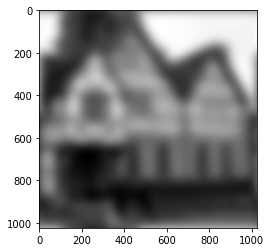

In [20]:
def read_2D_data(filename):
    """Reads 2D data
    
    Args:
        filename (str): name of the file
    
    Returns:
        numpy array: the data"""
    
    data = None
    
    # YOUR CODE HERE
    data = np.loadtxt(filename)
    #raise NotImplementedError()
    
    return data

data = read_2D_data('blur.txt')

# plotting
# YOUR CODE HERE
plt.imshow(data, cmap='gray')
plt.show()
#raise NotImplementedError()

In [21]:
# validation

data = read_2D_data('blur.txt')
assert isinstance(data, np.ndarray), 'bad function'
assert data.dtype == float, 'bad function'
assert data.shape == (1024, 1024), 'bad function'

(b) Write another program that creates an array, of the same size as the
  photo, containing a grid of samples drawn from the Gaussian~$f(x,y)$
  above with $\sigma=25$.  Make a density plot of these values on the
  screen too, so that you get a visualization of your point spread
  function.  Remember that the point spread function is periodic (along
  both axes), which means that the values for negative $x$ and $y$ are
  repeated at the end of the interval.  Since the Gaussian is centered on
  the origin, this means there should be bright patches in each of the four
  corners of your picture, something like this:

<img src="psf.png" width="250" />

Note: This photo has a smaller shape, than the blur.txt, therefore the 
spreads will not be as drastic as in the photo.

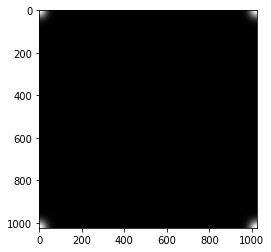

In [22]:
def get_point_spread_function(data, sigma):
    """Retruns a gaussian point spread function
    
    Args:
        data (numpy array): the photo array to get the size of the spread function
        sigma (float): sigma of gaussian
    
    Returns:
        numpy array: the point spread function"""
    spread = np.zeros_like(data)
    
    # YOUR CODE HERE
    w = 2*sigma**2
    
    # Upper left corner
    x,y = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
    d = x*x + y*y
    spread += np.exp(-d/w)
    
    # Upper right corner
    x,y = np.meshgrid(np.arange(data.shape[0]-1,-1,-1), np.arange(data.shape[1]))
    d = x*x + y*y
    spread += np.exp(-d/w)
    
    # Lower left corner
    x,y = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]-1,-1,-1))
    d = x*x + y*y
    spread += np.exp(-d/w)
    
    # Lower right corner
    x,y = np.meshgrid(np.arange(data.shape[0]-1,-1,-1), np.arange(data.shape[1]-1,-1,-1))
    d = x*x + y*y
    spread += np.exp(-d/w)
    #raise NotImplementedError()
    
    return spread

point_func = get_point_spread_function(data, 25)

# plotting
# YOUR CODE HERE
plt.imshow(point_func, cmap='gray')
plt.show()
#raise NotImplementedError()

In [23]:
# validation
fn = read_2D_data('blur.txt')
pt_fn = get_point_spread_function(fn, 25)
assert pt_fn.shape == fn.shape, 'shape mismatch'
# checking 90 deg rotational symmetry, since the gaussian is even in all corners
assert np.mean(np.abs(pt_fn - np.rot90(pt_fn, k=1))) <= 1e-4, 'bad function'

(c) Combine your two programs and add Fourier transforms using the
  functions `rfft2` and `irfft2` from `numpy.fft`, to make a
  program that does the following:

i) Calculates Fourier transform of both, photo and point spread function

ii) Divides one by the other

iii) Performs an inverse transform to get the unblurred photo

iv) Displays the unblurred photo on the screen

When you are done, you should be able to make out the scene in
the photo, although probably it will still not be perfectly sharp.

Hint: One thing you'll need to deal with is what happens when the Fourier
transform of the point spread function is zero, or close to zero.  In that
case if you divide by it you'll get an error (because you can't divide by
zero) or just a very large number (because you're dividing by something
small).  A workable compromise is that if a value in the Fourier transform
of the point spread function is smaller than a certain amount $\epsilon$
you don't divide by it---just leave that coefficient alone.  The value of
$\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$.

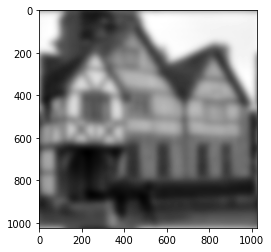

In [24]:
def deconvolve(data, point_function):
    """Deconvolves point_function from the data
    
    Args:
        data (numpy array): the 2D data to deconvolve
        point_dunction (numpy array): the point function
    
    Returns:
        numpy array: Deconvolved array"""
    
    deconv_data = np.zeros_like(data)
    epsilon = 1e-3
    
    # YOUR CODE HERE
    # FFT for the blurred data
    rfft_data = np.fft.rfft2(data)
    
    # FFT for the spread function
    rfft_pf = np.fft.rfft2(point_function)
    
    # Assign elements lower than epsilon to 1 in spread func fft
    # (division by 1 = No division)
    rfft_pf[rfft_pf < epsilon] = 1
    
    # a_kl = b_kl / (f_kl * K * L)
    conv_data = rfft_data / (rfft_pf * data.shape[0] * data.shape[1])
    
    # Inverse FFT for the convoluted data
    deconv_data = np.fft.irfft2(conv_data)
    #raise NotImplementedError()
    
    return deconv_data

data = read_2D_data('blur.txt')
# try different values of sigma to get the best deconvolution without artefacts
point_func = get_point_spread_function(data, 19)
deconc_data = deconvolve(data, point_func)

# plotting
# YOUR CODE HERE
plt.imshow(deconc_data, cmap='gray')
plt.show()
#raise NotImplementedError()

(d) Bearing in mind this last point about zeros in the Fourier transform,
  what is it that limits our ability to deblur a photo?  Why can we not
  perfectly unblur any photo and make it completely sharp?


We have seen this process in action here for a normal snapshot, but it is
also used in many physics applications where one takes photos.  For
instance, it is used in astronomy to enhance photos taken by telescopes.
It was famously used with images from the Hubble Space Telescope
after it was realized that the telescope's main mirror had a serious
manufacturing flaw and was returning blurry photos---scientists managed to
partially correct the blurring using Fourier transform techniques.

### Answer (double click to edit)

If the values in the fourier transformed point function become very small, those points cannot be divided, i.e. it is left "untreated", which decreases the unblurring. If enough points are left untouched, the image cannot be properly unblurred. Because the fourier transform produces very small values for at least some of the points, the unblurring can never be perfect. Also, if the point function parameter sigma is increased too much, artifacts are introduced to the image. While increasing the sigma makes the image sharper, at some point it start to draw grid-like dots on the image, which occurs because the Gaussians become too wide.